In [ ]:
## In this notebook, we try to learn by fixing drug

In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'bin', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])

In [4]:
df = df[df['rejected'] == False]
df = df.drop(columns='rejected')

In [5]:
drug_name = df['drug_name'].unique()
drug_name

array(['tanoclolol', 'oxasoted', 'cupitelol', 'mamate', 'lalol',
       'foxivelule', 'tafistitrisin', 'prazinib', 'momudobatin',
       'cibroniudosin', 'rulfalol', 'keglusited', 'pucomalol',
       'glycontazepelol', 'glycogane', 'cicrochoric', 'satrade', 'tovane',
       'suvinicuvir', 'semufolic', 'ratin', 'hozirol', 'dienulol',
       'hivir', 'diadaric', 'tocilic', 'gorol', 'simarol', 'vocopirin',
       'cycloxasonol', 'bovirol', 'brede', 'nusudaric', 'mule',
       'nephelilin', 'antimab', 'plazamiglutic', 'colifunene',
       'vivafastat', 'tugesutin', 'isobrovelin', 'hidizuzunib',
       'flacelfatastat', 'choxestamenium', 'colade', 'sorine', 'dusin',
       'tricatripride', 'fazipilin', 'tocrocin', 'glulune', 'fumiluric',
       'kediborin', 'ribosatharin', 'todiadianic', 'spifistime',
       'nicotilin', 'notin', 'gosate', 'monemodiase', 'gentipapavir',
       'debome', 'lixegimoric', 'sacrode', 'prefluflomycin',
       'thiostasteglume', 'cuxirin', 'flalurin', 'genetramyci

In [6]:
df_tanoclolol = df[df['drug_name']=='tanoclolol']
df_tanoclolol = df_tanoclolol.drop(columns='drug_name')
df_tanoclolol

,pharmacy,diagnosis,pcn,group,patient_pay,brand,month
0,6,G99.93,1UQC,NaN,13.39,branded,1
10,55,K32.86,NaN,STGRDKR1J5RD,10.77,branded,1
18,25,G99.93,327CKV,IOEAN1DWVV3Y,6.50,generic,1
33,6,K32.86,327CKV,IOEAN1DWVV3Y,11.15,branded,1
53,20,G99.93,WM6A,L9QZA,10.00,generic,1
...,...,...,...,...,...,...,...
12561771,24,K32.86,NaN,7LL04USF,5.24,generic,12
12561785,53,K32.86,RB7UU,RS5RB3YA,12.54,branded,12
12561830,18,K32.86,3O71UTS,NaN,12.22,branded,12
12561832,5,K32.86,BIZF,QK6BI1N61,6.36,generic,12


In [7]:
df_tanoclolol['insurance'] = df_tanoclolol['pcn'].astype('str')+df_tanoclolol['group'].astype('str')
df_tanoclolol = df_tanoclolol.drop(columns=['pcn','group'])

In [8]:
train, test = train_test_split(df_tanoclolol, test_size=0.2, shuffle=True, random_state=42)

In [9]:
train_data = train.drop(columns=['patient_pay'])
train_label = train['patient_pay']

In [10]:
train_data.columns

Index(['pharmacy', 'diagnosis', 'brand', 'month', 'insurance'], dtype='object')

In [11]:
train_pool = Pool(train_data, train_label, cat_features = list(range(5)))

In [12]:
model = CatBoostRegressor(iterations =999, 
                         depth = 10,
                         learning_rate=1,
                         loss_function = 'RMSE')
model.fit(train_pool)

0:	learn: 1.4173855	total: 461ms	remaining: 7m 40s
1:	learn: 1.2006626	total: 777ms	remaining: 6m 27s
2:	learn: 0.9970048	total: 1.18s	remaining: 6m 31s
3:	learn: 0.9257780	total: 1.46s	remaining: 6m 1s
4:	learn: 0.8620513	total: 1.62s	remaining: 5m 21s
5:	learn: 0.8391861	total: 1.86s	remaining: 5m 7s
6:	learn: 0.7973247	total: 2.09s	remaining: 4m 56s
7:	learn: 0.7838773	total: 2.29s	remaining: 4m 43s
8:	learn: 0.7771714	total: 2.55s	remaining: 4m 40s
9:	learn: 0.7596104	total: 2.8s	remaining: 4m 36s
10:	learn: 0.7435005	total: 2.96s	remaining: 4m 26s
11:	learn: 0.7378838	total: 3.16s	remaining: 4m 20s
12:	learn: 0.7282340	total: 3.37s	remaining: 4m 15s
13:	learn: 0.7131952	total: 3.59s	remaining: 4m 12s
14:	learn: 0.7085462	total: 3.86s	remaining: 4m 13s
15:	learn: 0.7056477	total: 4.09s	remaining: 4m 11s
16:	learn: 0.6927734	total: 4.3s	remaining: 4m 8s
17:	learn: 0.6863019	total: 4.5s	remaining: 4m 5s
18:	learn: 0.6797605	total: 4.76s	remaining: 4m 5s
19:	learn: 0.6765563	total: 4.

159:	learn: 0.4619436	total: 34.7s	remaining: 3m 2s
160:	learn: 0.4614091	total: 34.9s	remaining: 3m 1s
161:	learn: 0.4609267	total: 35.2s	remaining: 3m 1s
162:	learn: 0.4603979	total: 35.4s	remaining: 3m 1s
163:	learn: 0.4599126	total: 35.6s	remaining: 3m 1s
164:	learn: 0.4597834	total: 35.8s	remaining: 3m 1s
165:	learn: 0.4595583	total: 36s	remaining: 3m
166:	learn: 0.4576437	total: 36.3s	remaining: 3m
167:	learn: 0.4563672	total: 36.5s	remaining: 3m
168:	learn: 0.4545378	total: 36.7s	remaining: 3m
169:	learn: 0.4542609	total: 36.8s	remaining: 2m 59s
170:	learn: 0.4539582	total: 37.1s	remaining: 2m 59s
171:	learn: 0.4529227	total: 37.2s	remaining: 2m 59s
172:	learn: 0.4527288	total: 37.4s	remaining: 2m 58s
173:	learn: 0.4524079	total: 37.6s	remaining: 2m 58s
174:	learn: 0.4521986	total: 37.7s	remaining: 2m 57s
175:	learn: 0.4518313	total: 38s	remaining: 2m 57s
176:	learn: 0.4515501	total: 38.2s	remaining: 2m 57s
177:	learn: 0.4514235	total: 38.4s	remaining: 2m 57s
178:	learn: 0.44987

315:	learn: 0.3908172	total: 1m 5s	remaining: 2m 20s
316:	learn: 0.3907999	total: 1m 5s	remaining: 2m 20s
317:	learn: 0.3905372	total: 1m 5s	remaining: 2m 20s
318:	learn: 0.3894252	total: 1m 5s	remaining: 2m 20s
319:	learn: 0.3889788	total: 1m 5s	remaining: 2m 19s
320:	learn: 0.3888313	total: 1m 6s	remaining: 2m 19s
321:	learn: 0.3883436	total: 1m 6s	remaining: 2m 19s
322:	learn: 0.3877890	total: 1m 6s	remaining: 2m 19s
323:	learn: 0.3871025	total: 1m 6s	remaining: 2m 18s
324:	learn: 0.3870377	total: 1m 6s	remaining: 2m 18s
325:	learn: 0.3861429	total: 1m 6s	remaining: 2m 18s
326:	learn: 0.3853162	total: 1m 7s	remaining: 2m 17s
327:	learn: 0.3850286	total: 1m 7s	remaining: 2m 17s
328:	learn: 0.3846763	total: 1m 7s	remaining: 2m 17s
329:	learn: 0.3844885	total: 1m 7s	remaining: 2m 17s
330:	learn: 0.3842378	total: 1m 7s	remaining: 2m 17s
331:	learn: 0.3841705	total: 1m 8s	remaining: 2m 16s
332:	learn: 0.3840826	total: 1m 8s	remaining: 2m 16s
333:	learn: 0.3840451	total: 1m 8s	remaining: 

470:	learn: 0.3466074	total: 1m 36s	remaining: 1m 48s
471:	learn: 0.3464317	total: 1m 36s	remaining: 1m 47s
472:	learn: 0.3461311	total: 1m 36s	remaining: 1m 47s
473:	learn: 0.3459359	total: 1m 37s	remaining: 1m 47s
474:	learn: 0.3457999	total: 1m 37s	remaining: 1m 47s
475:	learn: 0.3454860	total: 1m 37s	remaining: 1m 47s
476:	learn: 0.3452836	total: 1m 37s	remaining: 1m 46s
477:	learn: 0.3451386	total: 1m 37s	remaining: 1m 46s
478:	learn: 0.3450600	total: 1m 38s	remaining: 1m 46s
479:	learn: 0.3447449	total: 1m 38s	remaining: 1m 46s
480:	learn: 0.3438875	total: 1m 38s	remaining: 1m 46s
481:	learn: 0.3435890	total: 1m 38s	remaining: 1m 45s
482:	learn: 0.3433312	total: 1m 38s	remaining: 1m 45s
483:	learn: 0.3431571	total: 1m 39s	remaining: 1m 45s
484:	learn: 0.3430087	total: 1m 39s	remaining: 1m 45s
485:	learn: 0.3428807	total: 1m 39s	remaining: 1m 45s
486:	learn: 0.3413574	total: 1m 39s	remaining: 1m 44s
487:	learn: 0.3409911	total: 1m 39s	remaining: 1m 44s
488:	learn: 0.3408402	total:

623:	learn: 0.3125443	total: 2m 5s	remaining: 1m 15s
624:	learn: 0.3125037	total: 2m 5s	remaining: 1m 15s
625:	learn: 0.3123792	total: 2m 6s	remaining: 1m 15s
626:	learn: 0.3122735	total: 2m 6s	remaining: 1m 14s
627:	learn: 0.3120604	total: 2m 6s	remaining: 1m 14s
628:	learn: 0.3119438	total: 2m 6s	remaining: 1m 14s
629:	learn: 0.3118537	total: 2m 6s	remaining: 1m 14s
630:	learn: 0.3116135	total: 2m 7s	remaining: 1m 14s
631:	learn: 0.3115858	total: 2m 7s	remaining: 1m 13s
632:	learn: 0.3115598	total: 2m 7s	remaining: 1m 13s
633:	learn: 0.3114674	total: 2m 7s	remaining: 1m 13s
634:	learn: 0.3114370	total: 2m 7s	remaining: 1m 13s
635:	learn: 0.3112401	total: 2m 8s	remaining: 1m 13s
636:	learn: 0.3111408	total: 2m 8s	remaining: 1m 12s
637:	learn: 0.3108654	total: 2m 8s	remaining: 1m 12s
638:	learn: 0.3107844	total: 2m 8s	remaining: 1m 12s
639:	learn: 0.3104381	total: 2m 8s	remaining: 1m 12s
640:	learn: 0.3103849	total: 2m 9s	remaining: 1m 12s
641:	learn: 0.3102616	total: 2m 9s	remaining: 

780:	learn: 0.2875292	total: 2m 36s	remaining: 43.8s
781:	learn: 0.2874667	total: 2m 37s	remaining: 43.6s
782:	learn: 0.2874462	total: 2m 37s	remaining: 43.4s
783:	learn: 0.2873850	total: 2m 37s	remaining: 43.2s
784:	learn: 0.2872980	total: 2m 37s	remaining: 43s
785:	learn: 0.2872557	total: 2m 37s	remaining: 42.8s
786:	learn: 0.2868184	total: 2m 38s	remaining: 42.6s
787:	learn: 0.2867286	total: 2m 38s	remaining: 42.4s
788:	learn: 0.2866890	total: 2m 38s	remaining: 42.2s
789:	learn: 0.2862156	total: 2m 38s	remaining: 42s
790:	learn: 0.2860866	total: 2m 38s	remaining: 41.8s
791:	learn: 0.2859329	total: 2m 39s	remaining: 41.6s
792:	learn: 0.2858865	total: 2m 39s	remaining: 41.4s
793:	learn: 0.2856556	total: 2m 39s	remaining: 41.2s
794:	learn: 0.2854954	total: 2m 39s	remaining: 41s
795:	learn: 0.2854160	total: 2m 40s	remaining: 40.8s
796:	learn: 0.2853785	total: 2m 40s	remaining: 40.6s
797:	learn: 0.2853427	total: 2m 40s	remaining: 40.4s
798:	learn: 0.2851971	total: 2m 40s	remaining: 40.2s

937:	learn: 0.2662019	total: 3m 10s	remaining: 12.4s
938:	learn: 0.2661553	total: 3m 10s	remaining: 12.2s
939:	learn: 0.2661173	total: 3m 10s	remaining: 12s
940:	learn: 0.2661067	total: 3m 11s	remaining: 11.8s
941:	learn: 0.2660886	total: 3m 11s	remaining: 11.6s
942:	learn: 0.2660157	total: 3m 11s	remaining: 11.4s
943:	learn: 0.2659620	total: 3m 11s	remaining: 11.2s
944:	learn: 0.2658210	total: 3m 12s	remaining: 11s
945:	learn: 0.2657614	total: 3m 12s	remaining: 10.8s
946:	learn: 0.2657091	total: 3m 12s	remaining: 10.6s
947:	learn: 0.2656556	total: 3m 12s	remaining: 10.4s
948:	learn: 0.2654884	total: 3m 12s	remaining: 10.2s
949:	learn: 0.2653703	total: 3m 13s	remaining: 9.96s
950:	learn: 0.2652120	total: 3m 13s	remaining: 9.75s
951:	learn: 0.2652015	total: 3m 13s	remaining: 9.55s
952:	learn: 0.2651045	total: 3m 13s	remaining: 9.35s
953:	learn: 0.2646508	total: 3m 13s	remaining: 9.15s
954:	learn: 0.2645476	total: 3m 14s	remaining: 8.94s
955:	learn: 0.2644653	total: 3m 14s	remaining: 8.7

In [13]:
test_data = test.drop(columns=['patient_pay'])
test_label = test['patient_pay']
preds=model.predict(test_data)
diff = abs(preds - test_label)
diff.describe()

count    9.513800e+04
mean     2.188604e-01
std      4.429487e-01
min      7.469908e-08
25%      1.729656e-02
50%      5.528910e-02
75%      2.163811e-01
max      9.949198e+00
Name: patient_pay, dtype: float64

In [14]:
np.percentile(diff, 90), np.percentile(diff, 95), np.percentile(diff, 98), np.percentile(diff, 99), np.percentile(diff, 100)

(0.605118516151216,
 1.0228873554786986,
 1.5654563768167273,
 2.102665828683636,
 9.949198431080454)

In [15]:
test_label.describe()

count    95138.000000
mean         9.952059
std          4.728414
min          3.400000
25%          6.340000
50%          8.180000
75%         13.540000
max         19.820000
Name: patient_pay, dtype: float64

In [ ]:
##### Another drug

In [17]:
df_oxasoted = df[df['drug_name']=='oxasoted']
df_oxasoted = df_oxasoted.drop(columns='drug_name')

In [18]:
df_oxasoted['insurance'] = df_oxasoted['pcn'].astype('str')+df_oxasoted['group'].astype('str')
df_oxasoted = df_oxasoted.drop(columns=['pcn','group'])

In [19]:
train, test = train_test_split(df_oxasoted, test_size=0.2, shuffle=True, random_state=42)

In [20]:
train_data = train.drop(columns=['patient_pay'])
train_label = train['patient_pay']

In [21]:
train_pool = Pool(train_data, train_label, cat_features = list(range(5)))

In [22]:
model_oxasoted = CatBoostRegressor(iterations =999, 
                         depth = 10,
                         learning_rate=1,
                         loss_function = 'RMSE')
model_oxasoted.fit(train_pool)

0:	learn: 1.4746558	total: 207ms	remaining: 3m 26s
1:	learn: 1.2094763	total: 419ms	remaining: 3m 28s
2:	learn: 1.1348338	total: 566ms	remaining: 3m 7s
3:	learn: 1.0428418	total: 847ms	remaining: 3m 30s
4:	learn: 1.0238292	total: 1.05s	remaining: 3m 28s
5:	learn: 1.0041174	total: 1.25s	remaining: 3m 27s
6:	learn: 0.9765731	total: 1.45s	remaining: 3m 24s
7:	learn: 0.9525830	total: 1.56s	remaining: 3m 13s
8:	learn: 0.9251205	total: 1.7s	remaining: 3m 7s
9:	learn: 0.9095303	total: 1.9s	remaining: 3m 8s
10:	learn: 0.9008314	total: 2.08s	remaining: 3m 6s
11:	learn: 0.8919525	total: 2.27s	remaining: 3m 6s
12:	learn: 0.8848660	total: 2.44s	remaining: 3m 4s
13:	learn: 0.8722649	total: 2.59s	remaining: 3m 2s
14:	learn: 0.8631207	total: 2.73s	remaining: 2m 59s
15:	learn: 0.8575532	total: 2.88s	remaining: 2m 56s
16:	learn: 0.8501939	total: 3.04s	remaining: 2m 55s
17:	learn: 0.8363778	total: 3.18s	remaining: 2m 53s
18:	learn: 0.8290337	total: 3.36s	remaining: 2m 53s
19:	learn: 0.8237012	total: 3.5

159:	learn: 0.5273163	total: 26.1s	remaining: 2m 16s
160:	learn: 0.5270003	total: 26.2s	remaining: 2m 16s
161:	learn: 0.5262544	total: 26.4s	remaining: 2m 16s
162:	learn: 0.5243759	total: 26.6s	remaining: 2m 16s
163:	learn: 0.5218103	total: 26.7s	remaining: 2m 16s
164:	learn: 0.5209163	total: 26.9s	remaining: 2m 16s
165:	learn: 0.5206501	total: 27.1s	remaining: 2m 15s
166:	learn: 0.5202194	total: 27.2s	remaining: 2m 15s
167:	learn: 0.5195786	total: 27.4s	remaining: 2m 15s
168:	learn: 0.5193824	total: 27.6s	remaining: 2m 15s
169:	learn: 0.5182254	total: 27.7s	remaining: 2m 15s
170:	learn: 0.5175069	total: 27.9s	remaining: 2m 15s
171:	learn: 0.5168150	total: 28.1s	remaining: 2m 15s
172:	learn: 0.5163250	total: 28.3s	remaining: 2m 14s
173:	learn: 0.5158450	total: 28.4s	remaining: 2m 14s
174:	learn: 0.5156506	total: 28.6s	remaining: 2m 14s
175:	learn: 0.5153905	total: 28.7s	remaining: 2m 14s
176:	learn: 0.5149892	total: 28.9s	remaining: 2m 14s
177:	learn: 0.5130880	total: 29.1s	remaining: 

316:	learn: 0.4155007	total: 50.6s	remaining: 1m 48s
317:	learn: 0.4153033	total: 50.8s	remaining: 1m 48s
318:	learn: 0.4151757	total: 50.9s	remaining: 1m 48s
319:	learn: 0.4148831	total: 51.1s	remaining: 1m 48s
320:	learn: 0.4142521	total: 51.2s	remaining: 1m 48s
321:	learn: 0.4141281	total: 51.4s	remaining: 1m 48s
322:	learn: 0.4132496	total: 51.6s	remaining: 1m 47s
323:	learn: 0.4125179	total: 51.8s	remaining: 1m 47s
324:	learn: 0.4122819	total: 51.9s	remaining: 1m 47s
325:	learn: 0.4118810	total: 52.1s	remaining: 1m 47s
326:	learn: 0.4116337	total: 52.2s	remaining: 1m 47s
327:	learn: 0.4108255	total: 52.4s	remaining: 1m 47s
328:	learn: 0.4102838	total: 52.5s	remaining: 1m 46s
329:	learn: 0.4096716	total: 52.6s	remaining: 1m 46s
330:	learn: 0.4094786	total: 52.7s	remaining: 1m 46s
331:	learn: 0.4091448	total: 52.8s	remaining: 1m 46s
332:	learn: 0.4087977	total: 53s	remaining: 1m 45s
333:	learn: 0.4085023	total: 53.1s	remaining: 1m 45s
334:	learn: 0.4080675	total: 53.2s	remaining: 1m

471:	learn: 0.3569151	total: 1m 15s	remaining: 1m 23s
472:	learn: 0.3567028	total: 1m 15s	remaining: 1m 23s
473:	learn: 0.3565114	total: 1m 15s	remaining: 1m 23s
474:	learn: 0.3560715	total: 1m 15s	remaining: 1m 23s
475:	learn: 0.3557449	total: 1m 15s	remaining: 1m 23s
476:	learn: 0.3555791	total: 1m 15s	remaining: 1m 23s
477:	learn: 0.3553150	total: 1m 16s	remaining: 1m 22s
478:	learn: 0.3544479	total: 1m 16s	remaining: 1m 22s
479:	learn: 0.3541321	total: 1m 16s	remaining: 1m 22s
480:	learn: 0.3540428	total: 1m 16s	remaining: 1m 22s
481:	learn: 0.3533216	total: 1m 16s	remaining: 1m 22s
482:	learn: 0.3527554	total: 1m 16s	remaining: 1m 21s
483:	learn: 0.3527164	total: 1m 16s	remaining: 1m 21s
484:	learn: 0.3524811	total: 1m 17s	remaining: 1m 21s
485:	learn: 0.3522593	total: 1m 17s	remaining: 1m 21s
486:	learn: 0.3520487	total: 1m 17s	remaining: 1m 21s
487:	learn: 0.3518218	total: 1m 17s	remaining: 1m 21s
488:	learn: 0.3515844	total: 1m 17s	remaining: 1m 20s
489:	learn: 0.3513738	total:

625:	learn: 0.3122935	total: 1m 39s	remaining: 59.1s
626:	learn: 0.3121856	total: 1m 39s	remaining: 58.9s
627:	learn: 0.3118326	total: 1m 39s	remaining: 58.8s
628:	learn: 0.3116883	total: 1m 39s	remaining: 58.6s
629:	learn: 0.3116578	total: 1m 39s	remaining: 58.5s
630:	learn: 0.3115372	total: 1m 40s	remaining: 58.3s
631:	learn: 0.3114675	total: 1m 40s	remaining: 58.2s
632:	learn: 0.3113273	total: 1m 40s	remaining: 58s
633:	learn: 0.3112258	total: 1m 40s	remaining: 57.9s
634:	learn: 0.3106394	total: 1m 40s	remaining: 57.7s
635:	learn: 0.3100471	total: 1m 40s	remaining: 57.6s
636:	learn: 0.3097128	total: 1m 41s	remaining: 57.4s
637:	learn: 0.3092144	total: 1m 41s	remaining: 57.3s
638:	learn: 0.3087990	total: 1m 41s	remaining: 57.1s
639:	learn: 0.3085385	total: 1m 41s	remaining: 57s
640:	learn: 0.3084367	total: 1m 41s	remaining: 56.8s
641:	learn: 0.3083369	total: 1m 41s	remaining: 56.7s
642:	learn: 0.3082498	total: 1m 42s	remaining: 56.5s
643:	learn: 0.3081244	total: 1m 42s	remaining: 56.

783:	learn: 0.2718562	total: 2m 6s	remaining: 34.8s
784:	learn: 0.2716993	total: 2m 6s	remaining: 34.6s
785:	learn: 0.2712742	total: 2m 7s	remaining: 34.4s
786:	learn: 0.2712359	total: 2m 7s	remaining: 34.3s
787:	learn: 0.2710007	total: 2m 7s	remaining: 34.1s
788:	learn: 0.2709064	total: 2m 7s	remaining: 34s
789:	learn: 0.2705584	total: 2m 7s	remaining: 33.8s
790:	learn: 0.2701263	total: 2m 7s	remaining: 33.6s
791:	learn: 0.2700168	total: 2m 8s	remaining: 33.5s
792:	learn: 0.2697996	total: 2m 8s	remaining: 33.3s
793:	learn: 0.2696609	total: 2m 8s	remaining: 33.2s
794:	learn: 0.2695722	total: 2m 8s	remaining: 33s
795:	learn: 0.2694740	total: 2m 8s	remaining: 32.9s
796:	learn: 0.2693937	total: 2m 9s	remaining: 32.7s
797:	learn: 0.2692019	total: 2m 9s	remaining: 32.5s
798:	learn: 0.2691030	total: 2m 9s	remaining: 32.4s
799:	learn: 0.2689207	total: 2m 9s	remaining: 32.2s
800:	learn: 0.2688151	total: 2m 9s	remaining: 32.1s
801:	learn: 0.2686561	total: 2m 9s	remaining: 31.9s
802:	learn: 0.26

939:	learn: 0.2459988	total: 2m 32s	remaining: 9.55s
940:	learn: 0.2458234	total: 2m 32s	remaining: 9.39s
941:	learn: 0.2457448	total: 2m 32s	remaining: 9.23s
942:	learn: 0.2456332	total: 2m 32s	remaining: 9.06s
943:	learn: 0.2454820	total: 2m 32s	remaining: 8.9s
944:	learn: 0.2453213	total: 2m 32s	remaining: 8.74s
945:	learn: 0.2452645	total: 2m 33s	remaining: 8.57s
946:	learn: 0.2448661	total: 2m 33s	remaining: 8.41s
947:	learn: 0.2446285	total: 2m 33s	remaining: 8.25s
948:	learn: 0.2445858	total: 2m 33s	remaining: 8.09s
949:	learn: 0.2444924	total: 2m 33s	remaining: 7.93s
950:	learn: 0.2443363	total: 2m 33s	remaining: 7.76s
951:	learn: 0.2442184	total: 2m 34s	remaining: 7.6s
952:	learn: 0.2440599	total: 2m 34s	remaining: 7.44s
953:	learn: 0.2439172	total: 2m 34s	remaining: 7.28s
954:	learn: 0.2437059	total: 2m 34s	remaining: 7.11s
955:	learn: 0.2436051	total: 2m 34s	remaining: 6.95s
956:	learn: 0.2434844	total: 2m 34s	remaining: 6.78s
957:	learn: 0.2434659	total: 2m 34s	remaining: 6

In [30]:
test_data = test.drop(columns=['patient_pay'])
test_label = test['patient_pay']
preds_t=model_oxasoted.predict(test_data)
diff_o = abs(preds_t - test_label)
diff_o.describe()

count    56566.000000
mean         0.255442
std          0.460317
min          0.000002
25%          0.034747
50%          0.096331
75%          0.268590
max         10.208377
Name: patient_pay, dtype: float64

In [31]:
np.percentile(diff_o, 90), np.percentile(diff_o, 95), np.percentile(diff_o, 98), np.percentile(diff_o, 99), np.percentile(diff_o, 100)

(0.6498227724173926,
 1.0362216914938007,
 1.7263322186281562,
 2.2948706694608334,
 10.208377150199507)

In [29]:
test_label.describe()

count    56566.000000
mean         9.963449
std          4.377903
min          5.240000
25%          6.340000
50%          7.970000
75%         13.390000
max         19.820000
Name: patient_pay, dtype: float64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

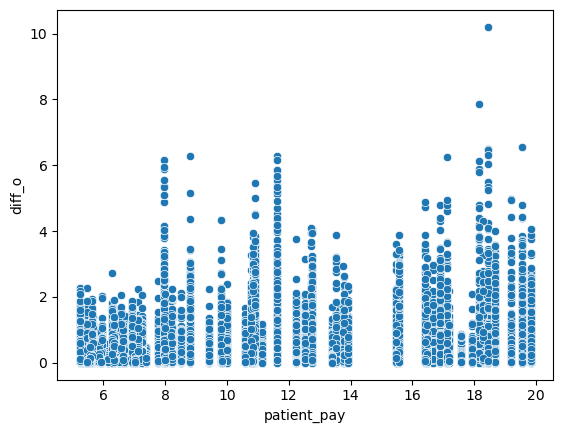

In [34]:
dplot2 =sns.scatterplot(x=test_label, y=diff_o)
dplot2.set(xlabel='patient_pay', ylabel='diff_o')
plt.plot()